# Basic commands of pandas

This notebook contains step by step method of analysing data with **pandas** library. It starts by how to read a data from a url and then how to view its rows.

In [1]:
import pandas as pd

In [5]:
orders = pd.read_table('http://bit.ly/chiporders')

In [6]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [11]:
users_col = ['user_id', 'age','gender','occupation','zipcode']
users = pd.read_table('http://bit.ly/movieusers',sep='|',header = None, names = users_col)

In [12]:
users.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [16]:
type(ufo)

pandas.core.frame.DataFrame

In [17]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [18]:
ufo['City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
18236              Grant Park
18237             Spirit Lake
18238             Eagle River
18239             Eagle River
18240                    Ybor
Name: City, Length: 18241, dtype: object

In [19]:
type(ufo['City'])

pandas.core.series.Series

In [22]:
ufo['Location'] = ufo['City']+','+ufo['State']

In [23]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca,NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro,NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke,CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene,KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair,NY"


In [24]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [25]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [26]:
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [27]:
movies.shape

(979, 6)

In [28]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [29]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'Location'],
      dtype='object')

In [30]:
ufo.columns = ufo.columns.str.replace(' ','_')

In [31]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time',
       'Location'],
      dtype='object')

In [32]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [33]:
movies['genre'].isin(['Drama','Action'])

0      False
1      False
2      False
3       True
4      False
       ...  
974    False
975    False
976     True
977    False
978    False
Name: genre, Length: 979, dtype: bool

In [34]:
movies[movies['genre'].isin(['Drama','Action'])]

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
...,...,...,...,...,...,...
968,7.4,The English Patient,R,Drama,162,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."


In [36]:
for c in movies.genre:
    print(c)

Crime
Crime
Crime
Action
Crime
Drama
Western
Adventure
Biography
Drama
Adventure
Action
Action
Drama
Adventure
Adventure
Drama
Drama
Biography
Action
Action
Crime
Drama
Crime
Drama
Comedy
Western
Drama
Crime
Comedy
Animation
Biography
Drama
Drama
Crime
Comedy
Action
Action
Mystery
Horror
Crime
Drama
Biography
Action
Action
Action
Mystery
Drama
Comedy
Crime
Drama
Drama
Comedy
Drama
Adventure
Animation
Drama
Horror
Drama
Western
Comedy
Animation
Horror
Crime
Animation
Crime
Comedy
Drama
Adventure
Animation
Comedy
Adventure
Drama
Drama
Drama
Action
Mystery
Drama
Crime
Crime
Action
Animation
Action
Drama
Drama
Adventure
Crime
Drama
Comedy
Drama
Crime
Drama
Crime
Comedy
Comedy
Drama
Action
Comedy
Crime
Biography
Action
Adventure
Drama
Comedy
Drama
Film-Noir
Comedy
Western
Drama
Comedy
Mystery
Comedy
Crime
Action
Adventure
Crime
Drama
Animation
Action
Western
Adventure
Drama
Crime
Action
Biography
Biography
Animation
Drama
Adventure
Action
Drama
Animation
Drama
Adventure
Drama
Action
Drama
A

In [37]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [38]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [39]:
import numpy as np

In [40]:
drinks.select_dtypes(include = [np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [41]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [43]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [44]:
drinks.drop('continent',axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [45]:
drinks.drop(2,axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [46]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [47]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [50]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [53]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry',dtype={'beer_servings':float})

In [54]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [49]:
drinks.beer_servings = drinks.beer_servings.astype(float)

In [55]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [56]:
%matplotlib inline

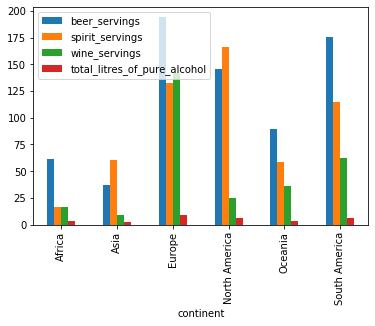

In [57]:
drinks.groupby('continent').mean().plot(kind='bar')

In [58]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [59]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [60]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [61]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [62]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [63]:
type(movies.genre.value_counts())

pandas.core.series.Series

In [64]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [65]:
movies.genre.nunique()

16

In [67]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


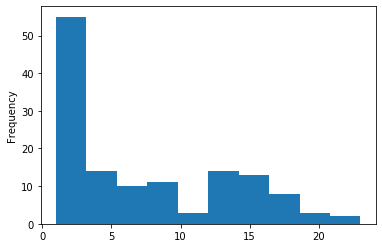

In [73]:
movies.duration.value_counts().plot(kind='hist')

In [70]:
%matplotlib inline

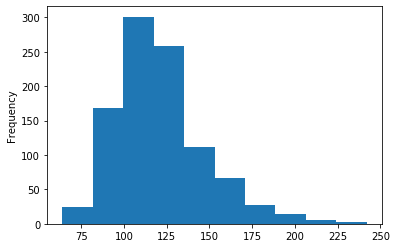

In [72]:
movies.duration.plot(kind='hist')

In [74]:
ufo.tail()

,City,Colors_Reported,Shape_Reported,State,Time,Location
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00,"Grant Park,IL"
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00,"Spirit Lake,IA"
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45,"Eagle River,WI"
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45,"Eagle River,WI"
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59,"Ybor,FL"


In [75]:
ufo.isNull().sum()

AttributeError: 'DataFrame' object has no attribute 'isNull'

In [76]:
ufo.isnull().sum()

City                  25
Colors_Reported    15359
Shape_Reported      2644
State                  0
Time                   0
Location              25
dtype: int64

In [1]:
drinks.head()

NameError: name 'drinks' is not defined

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

NameError: name 'pd' is not defined

In [3]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [5]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [7]:
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [8]:
drinks.loc[23,'beer_servings']

245

In [9]:
drinks.set_index('country',inplace=True)

In [10]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [12]:
drinks.loc['Algeria','spirit_servings']

0

In [13]:
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [14]:
drinks.index.name = 'Country'
drinks.index.reset_index(inplace = True)

AttributeError: 'Index' object has no attribute 'reset_index'

In [15]:
drinks.reset_index(inplace=True)

In [16]:
drinks.head()

,Country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [18]:
people = pd.Series([3000000,85000],index=['Albania','Andorra'], name = 'population')

In [19]:
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [20]:
drinks.set_index('Country',inplace=True)

In [21]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [22]:
drinks.beer_servings

Country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
              ... 
Venezuela      333
Vietnam        111
Yemen            6
Zambia          32
Zimbabwe        64
Name: beer_servings, Length: 193, dtype: int64

In [23]:
drinks.beer_servings*people

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
                  ...     
Venezuela              NaN
Vietnam                NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 193, dtype: float64

In [24]:
pd.concat([drinks,people],axis=1)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN
...,...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America,NaN
Vietnam,111,2,1,2.0,Asia,NaN
Yemen,6,0,0,0.1,Asia,NaN
Zambia,32,19,4,2.5,Africa,NaN


In [25]:
ufo  = pd.read_csv('http://bit.ly/uforeports')

In [26]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [27]:
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [30]:
ufo.loc[ufo.City=='Holyoke','State']

2        CO
771      MA
3221     MA
7982     MA
18211    MA
Name: State, dtype: object

In [31]:
ufo.iloc[0:3,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
type(drinks)

pandas.core.frame.DataFrame

In [5]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [6]:
type(drinks.country)

pandas.core.series.Series

In [7]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [8]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [10]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [11]:
drinks['continent'] = drinks['continent'].astype('category')

In [12]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [13]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [14]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [15]:
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [16]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [17]:
df = pd.DataFrame({'id':[101,102,103,104], 'quality':['good','very good','excellent','good']})

In [18]:
df

,id,quality
0,101,good
1,102,very good
2,103,excellent
3,104,good


In [23]:
df['quality'] = df['quality'].astype(pd.api.types.CategoricalDtype(categories=['good','very good','excellent'],ordered = True))

In [24]:
df.sort_values('quality')

,id,quality
0,101,good
3,104,good
1,102,very good
2,103,excellent


In [28]:
df.dtypes

id            int64
quality    category
dtype: object